# Exploratory Data Analysis (EDA)

## 1. Setup and Data Loading

First, we import necessary libraries and load the cleaned data into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mpl_colors

# Warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/advanced_feature_claims_data.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,years_as_customer,total_collected_premiums
0,0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,...,13020,52080,Saab,92x,2004,Y,40-49,Long-Term,27.33,38450.85
1,1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,...,780,3510,Mercedes,E400,2007,Y,40-49,Long-Term,19.00,22747.18
2,2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,...,3850,23100,Dodge,RAM,2007,N,20-29,Established,11.17,15784.77
3,3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,...,6340,50720,Chevrolet,Tahoe,2014,Y,40-49,Long-Term,21.33,30197.73
4,4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,...,650,4550,Accura,RSX,2009,N,40-49,Long-Term,19.00,30094.29


## 2. Data Overview

Understand the structure of the data by looking at its shape, columns, and basic statistics.

In [2]:
# Data structure overview
print(f'Data Shape: {df.shape}')
print('Columns:', df.columns)

# Basic statistics
df.describe().T

Data Shape: (1000, 44)
Columns: Index(['Unnamed: 0', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'ages_category',
       'customer_category', 'years_as_customer', 'total_collected_premiums'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.0,249.7500,499.500,749.2500,999.00
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.0,115.7500,199.500,276.2500,479.00
age,1000.0,3.888500e+01,9.290969e+00,0.0,32.0000,38.000,44.0000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.0,335980.2500,533135.000,759099.7500,999435.00
policy_deductable,1000.0,1.132000e+03,6.127409e+02,0.0,500.0000,1000.000,2000.0000,2000.00
policy_annual_premium,1000.0,1.253230e+03,2.534105e+02,0.0,1087.8750,1257.200,1415.6950,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.0,0.0000,0.000,0.0000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.0,448404.5000,466445.500,603251.0000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.0,0.0000,0.000,51025.0000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.0,-51500.0000,-23250.000,0.0000,0.00


## 3. Customer Demographics

Analyze demographic information such as age, sex, and education level of the insured.

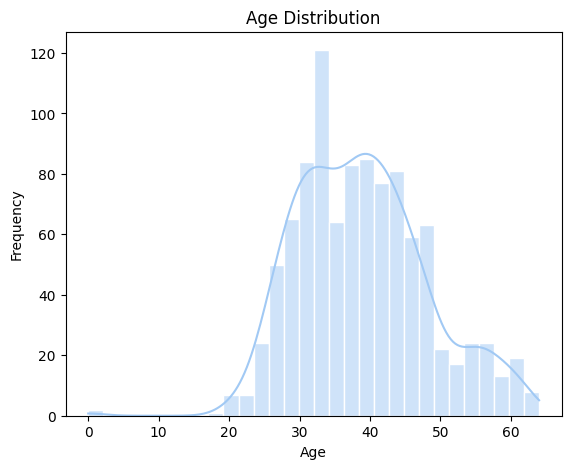

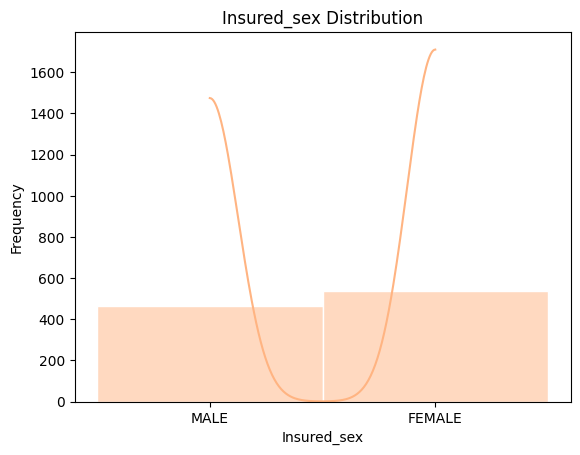

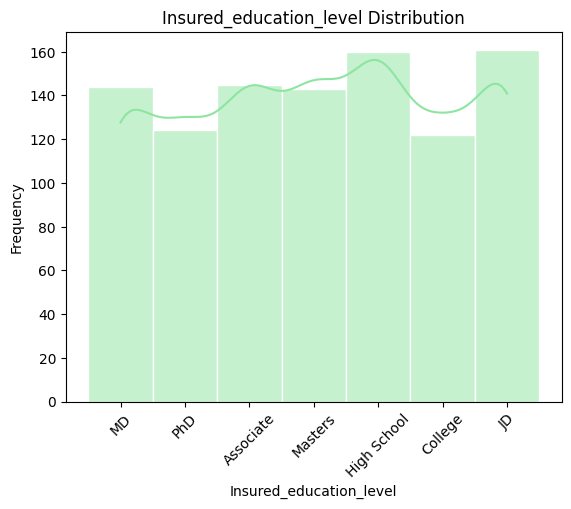

In [3]:
pastel_colors = sns.color_palette("pastel")
hex_pastel_colors = list(map(mpl_colors.rgb2hex, pastel_colors)) 
name_pastel_colors = ['Light Blue', 'Peach', 'Mint Green', 'Soft Red', 'Lavender', 'Tan', 'Pink', 'Light Grey', 'Lemon', 'Aqua']

plt.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.1)  # Adjust layout for better readability

# All charts with pastel colors and 10x6 figure size
for col, pal in zip(['age', 'insured_sex', 'insured_education_level'], [hex_pastel_colors[0], hex_pastel_colors[1], hex_pastel_colors[2]]):
    sns.histplot(df[col], bins=30, kde=True, color=pal, edgecolor='white')  # Age distribution
    plt.title(f'{col.capitalize()} Distribution')  # f-string for dynamic titles
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45 if col == 'insured_education_level' else 0)  # Rotate x-axis labels only for education level
    plt.show()

## 4. Policy Attributes

Examine key policy attributes like annual premium, deductibles, and umbrella limits.

<Figure size 640x480 with 0 Axes>

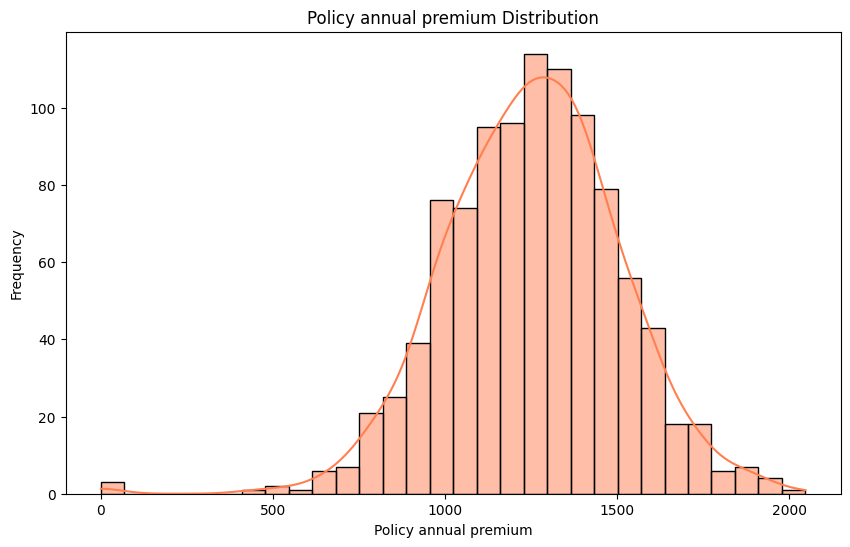

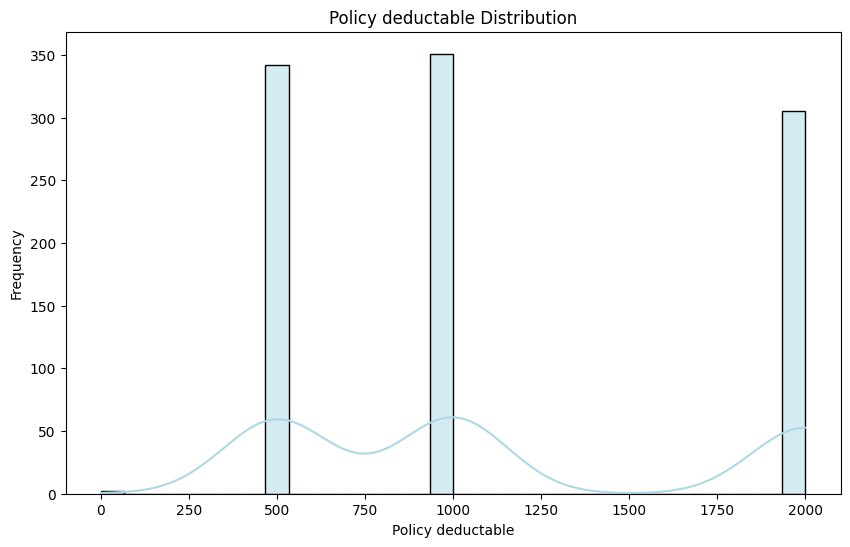

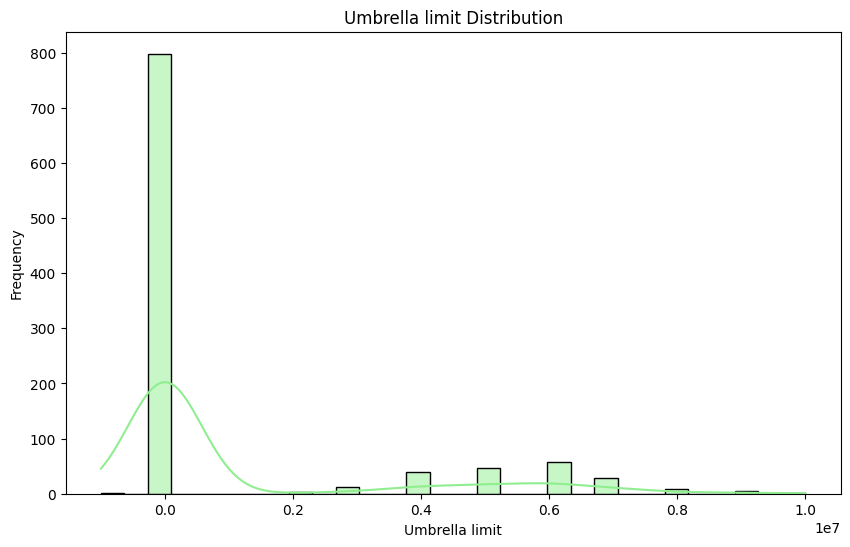

In [4]:
plt.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.1)  # Adjust layout for better readability

colors = ['coral', 'lightblue', 'lightgreen']  # List of colors

for i, col in enumerate(
    ['policy_annual_premium', 'policy_deductable', 'umbrella_limit']
):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size here

    sns.histplot(df[col], bins=30, kde=True, color=colors[i], ax=ax)  # Use the axis

    plt.title(f'{col.replace("_", " ").capitalize()} Distribution')  # Replace underscores and capitalize for titles
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.show()

## 5. Fraud Detection Patterns

Investigate patterns and trends related to reported fraud cases.

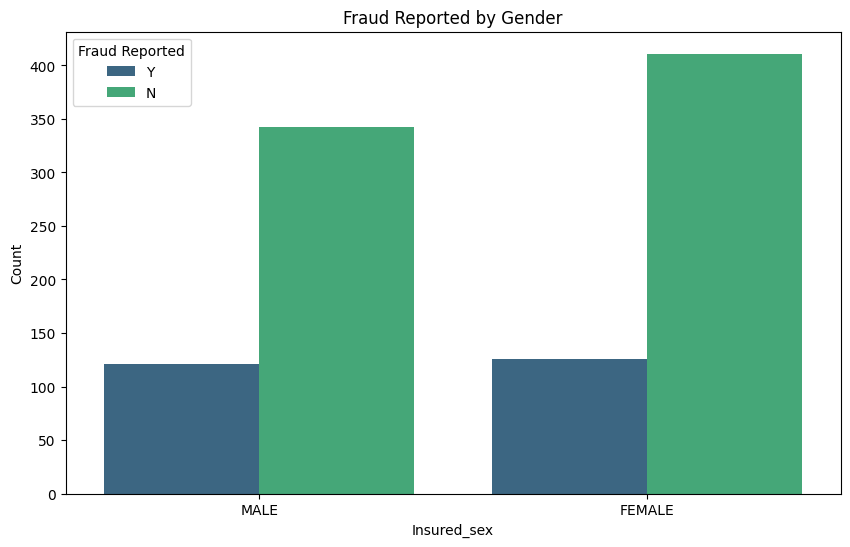

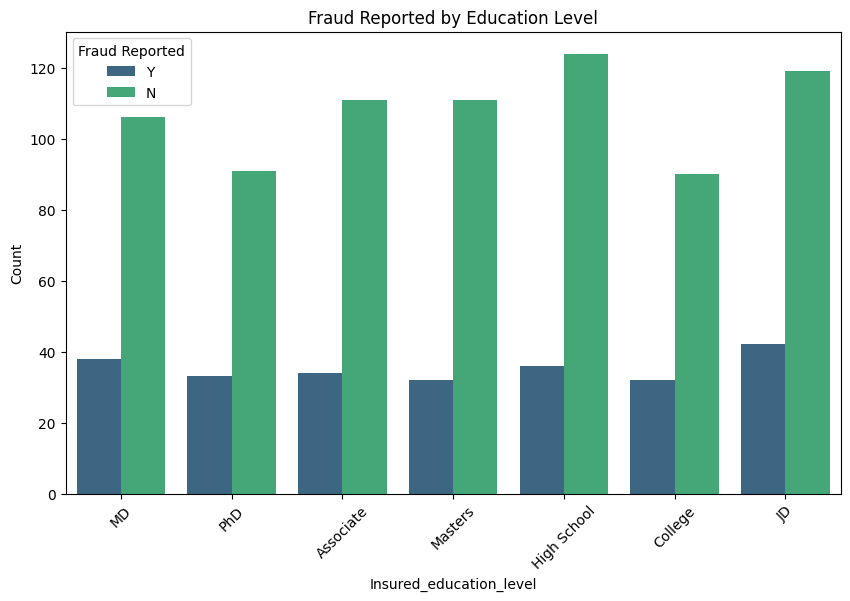

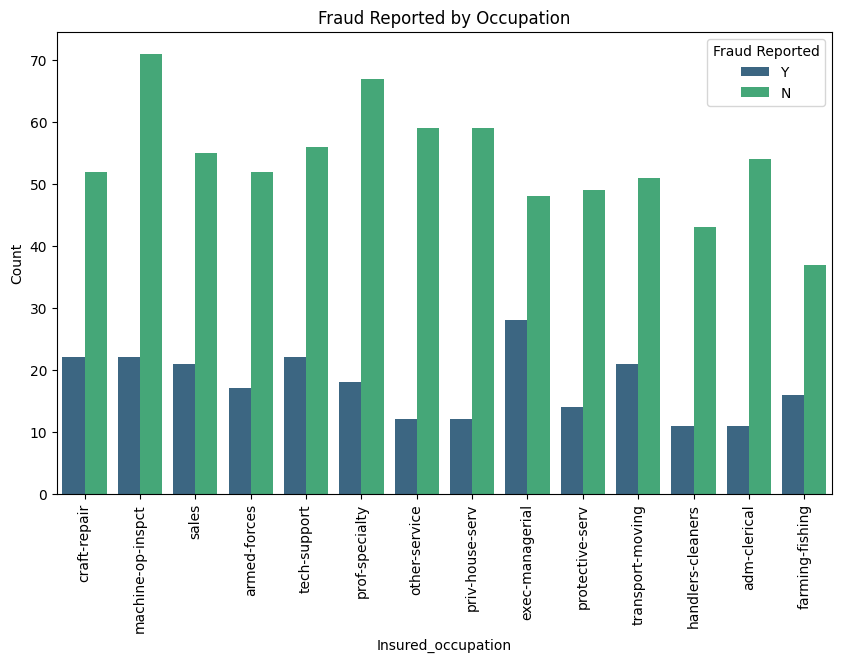

In [5]:

def create_countplot(data, x_var, hue_var, title, palette, x_rotation=0):
  plt.figure(figsize=(10, 6))
  sns.countplot(data=data, x=x_var, hue=hue_var, palette=palette)
  plt.title(title)
  plt.xlabel(x_var.capitalize())  # Capitalize x-axis label
  plt.ylabel('Count')
  plt.legend(title='Fraud Reported')
  plt.xticks(rotation=x_rotation)  # Optional x-axis rotation
  plt.show()

# Create visualizations using the function
create_countplot(df, 'insured_sex', 'fraud_reported', 'Fraud Reported by Gender', 'viridis')
create_countplot(df, 'insured_education_level', 'fraud_reported', 'Fraud Reported by Education Level', 'viridis', 45)
create_countplot(df, 'insured_occupation', 'fraud_reported', 'Fraud Reported by Occupation', 'viridis', 90)


## 6. Policy Analysis

Explore relationships between policy attributes and fraud detection.

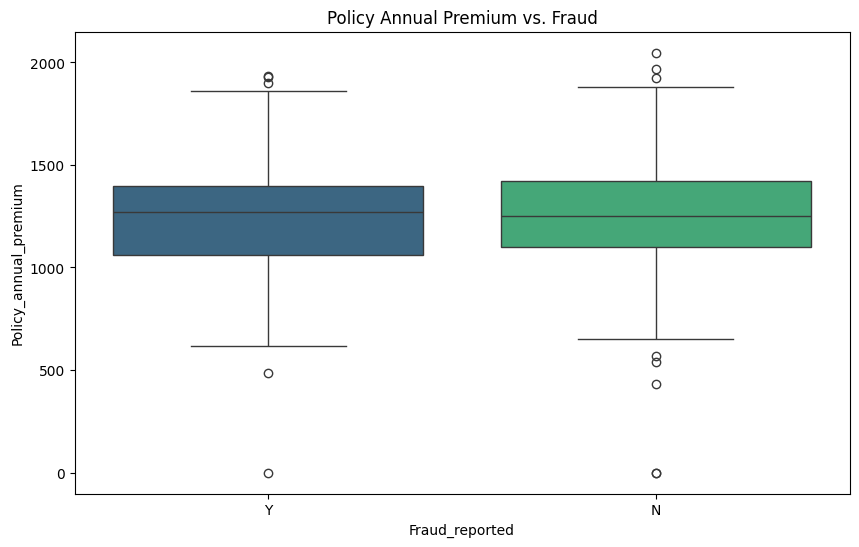

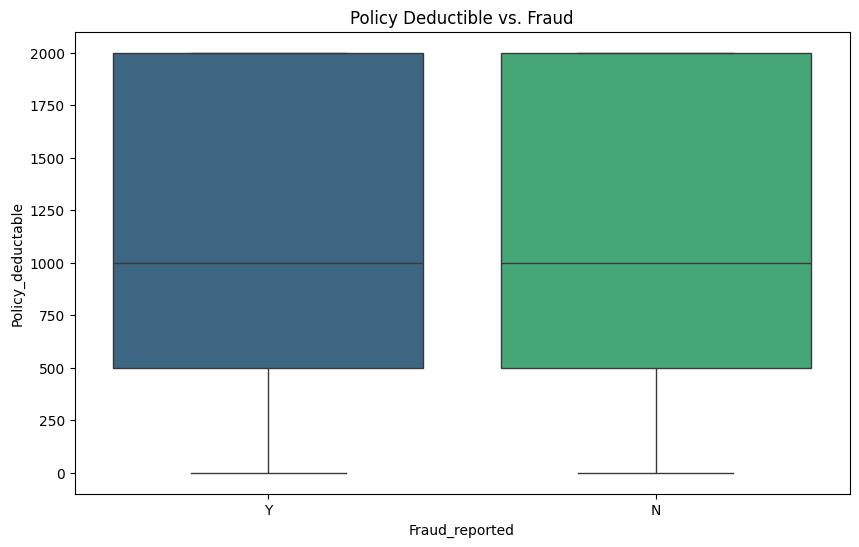

In [6]:
def create_boxplot(data, x_var, y_var, title):
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=data, x=x_var, y=y_var, palette='viridis')
  plt.title(title)
  plt.xlabel(x_var.capitalize())
  plt.ylabel(y_var.capitalize())  # Capitalize both x and y labels
  plt.show()

# Create visualizations using the function
create_boxplot(df, 'fraud_reported', 'policy_annual_premium', 'Policy Annual Premium vs. Fraud')
create_boxplot(df, 'fraud_reported', 'policy_deductable', 'Policy Deductible vs. Fraud')

## 7. Summary and Insights


### Customer Breakdown:
- Age: The majority of customers fall within the 30-45 year age group.
- Gender: The customer base shows a balanced gender distribution.

#### Key Findings:
- Education: A significant portion of customers hold college degrees or higher.
- Premiums: Annual premiums vary considerably, with a tendency to be lower in cost.
- Fraud: Certain professions and education levels are associated with higher rates of reported fraud.


## Conclusion

This EDA notebook has provided valuable insights into the customer demographics, policy attributes, and fraud detection patterns in the insurance data. These findings will help shape our strategies for targeting customers and managing risks effectively.